# 🫀 Heart Disease Detection
### Machine Learning Classification Project

**Goal:** Predict the presence of heart disease based on clinical features  
**Dataset:** Kaggle – Heart Disease Dataset  
**Models:** Random Forest, Gradient Boosting


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

sns.set(style="whitegrid")


## 1. Data Loading


In [ ]:
DATA_PATH = (r'C:\Users\mgroch\OneDrive - Interpublic\Desktop\Other\HDD\heart.csv')

df = pd.read_csv(DATA_PATH)
df.head()

The dataset contains clinical features used to predict the presence of heart disease.


In [21]:
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of samples: 1025
Number of features: 15


## 2. Exploratory Data Analysis (EDA)


In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
categ       0
dtype: int64

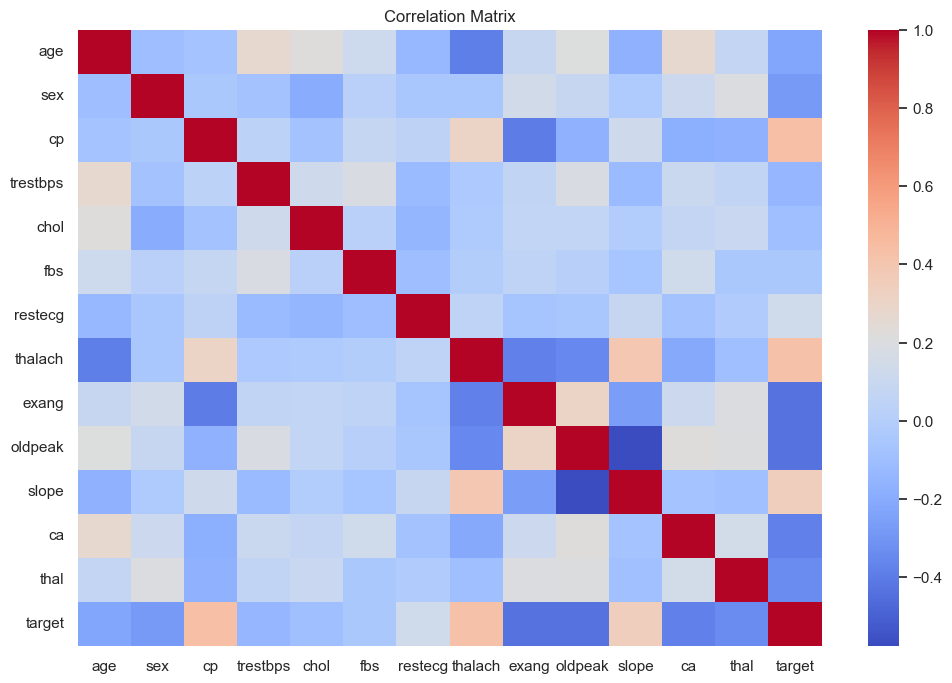

In [24]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()


## 3. Data Preprocessing


In [30]:
X = df.drop(columns="target")
y = df["target"]

X = X.select_dtypes(include=np.number)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Model Training: Scaled vs Non-Scaled Models

Some algorithms, like KNN, Logistic Regression, and SVC, are sensitive to the scale of the input features. 
We will train these models on scaled features and compare their performance with scale-insensitive models such as Random Forest, Gradient Boosting, and GaussianNB.

Model : Random Forest | Accuracy : 0.9853658536585366


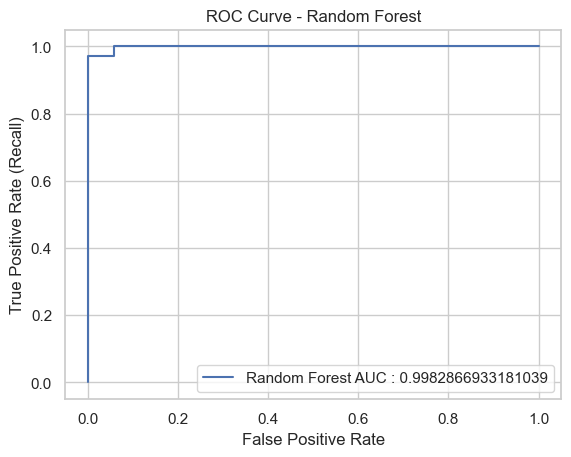

Model : Gausian | Accuracy : 0.8


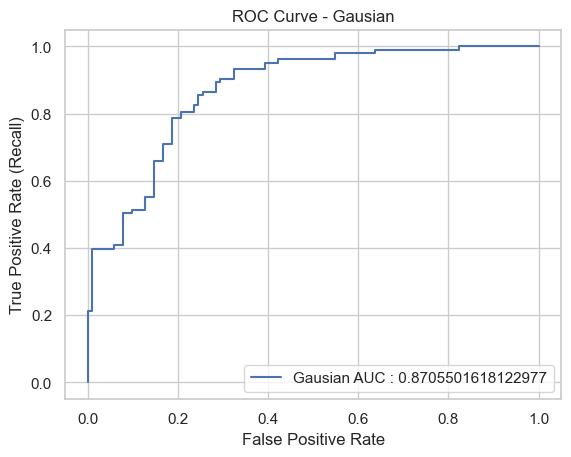

Model : Gradient | Accuracy : 0.9317073170731708


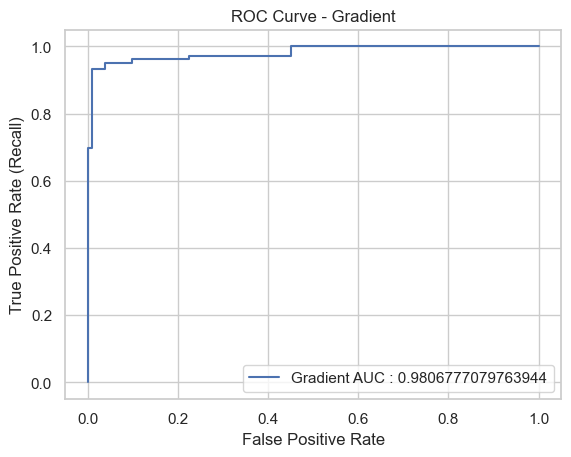

In [39]:
models = {
    "Random Forest" : RandomForestClassifier(),
    "Gausian" : GaussianNB(),
    "Gradient" : GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model : {name} | Accuracy : {accuracy}")
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, treshold = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label = f'{name} AUC : {auc}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc = "best")
    plt.title(f"ROC Curve - {name}")
    plt.show()

 Model : KNN | Accuracy : 0.8341463414634146
 Model : Logistic Regression | Accuracy : 0.7951219512195122
 Model : SVC | Accuracy : 0.8878048780487805


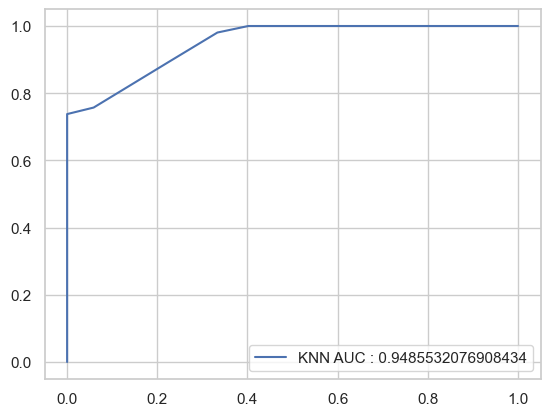

In [40]:
model_scaled = {
    'KNN' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'SVC' : SVC()
}

for name, model in model_scaled.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_pred, y_test)
    print(f' Model : {name} | Accuracy : {acc}')

KNN = model_scaled['KNN']
y_prob = KNN.predict_proba(X_test_scaled)[:,1]
fpr, tpr, treshold = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label = f"KNN AUC : {auc}")
plt.legend(loc = "best")
plt.show()

## 5. Hyperparameter Tuning (Random Forest)


In [41]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)
best_rf = grid.best_estimator_
grid.best_params_


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

## 6. Model Evaluation


In [42]:
rf_preds = best_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [43]:
gb_preds = gb.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, gb_preds))
print(classification_report(y_test, gb_preds))


Accuracy: 0.9317073170731708
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       102
           1       0.92      0.95      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



## 7. Feature Importance


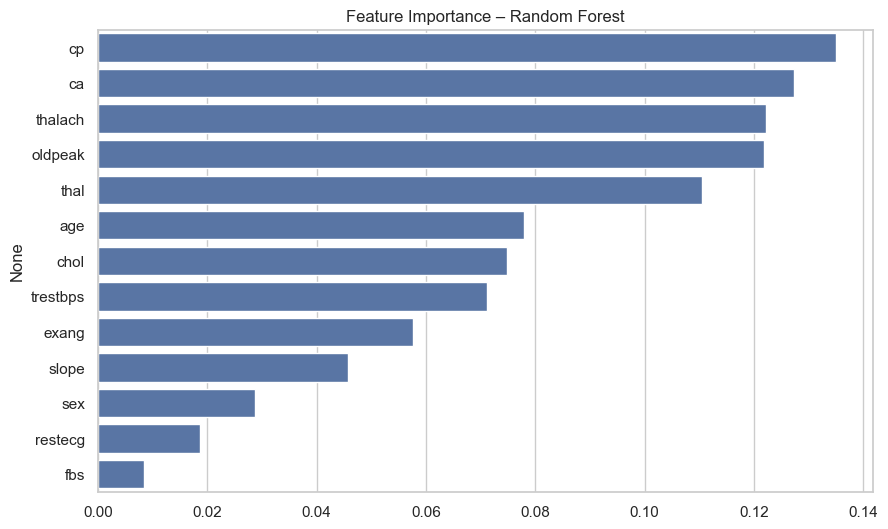

In [44]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances[indices],
    y=X.columns[indices]
)
plt.title("Feature Importance – Random Forest")
plt.show()


## 8. Summary

- Performed EDA and preprocessing
- Trained and compared a few ML models - both non scale sensitive and scale sensitive
- Tuned Random Forest hyperparameters
- Analyzed feature importance

**Possible improvements:**
- ROC AUC optimization
- Recall-focused metrics
- Model explainability (SHAP)
